In [ ]:
import tensorflow as tf
import numpy as np
import os
import random

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.6.0


In [ ]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_val_data_gen = ImageDataGenerator(rescale=1/255.)

data_dir = '../input/leafdataset/training'

train_val_gen = train_val_data_gen.flow_from_directory(directory=data_dir,
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               classes=None,
                                               class_mode='categorical',
                                               batch_size=8,
                                               shuffle=True,
                                               seed=seed)

Found 17728 images belonging to 14 classes.


In [ ]:
input_shape = (256, 256, 3)
epochs = 100

In [ ]:
def build_model(input_shape):
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    conv1 = tfkl.Conv2D(
        filters=16,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(input_layer)
    pool1 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv1)
    conv2 = tfkl.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool1)
    pool2 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv2)
    conv3 = tfkl.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool2)
    pool3 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv3)
    conv4 = tfkl.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool3)
    pool4 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv4)
    conv5 = tfkl.Conv2D(
        filters=256,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool4)
    pool5 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv5)
    flattening_layer = tfkl.Flatten(name='Flatten')(pool5)
    classifier_layer = tfkl.Dense(units=512, name='Classifier', kernel_initializer=tfk.initializers.GlorotUniform(seed), activation='relu')(flattening_layer)
    output_layer = tfkl.Dense(units=14, activation='softmax', kernel_initializer=tfk.initializers.GlorotUniform(seed), name='Output')(classifier_layer)
    
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='Model0')
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')
    return model

2021-11-26 11:36:50.335340: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-26 11:36:50.464039: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-26 11:36:50.465083: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-26 11:36:50.466896: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "Model0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0    

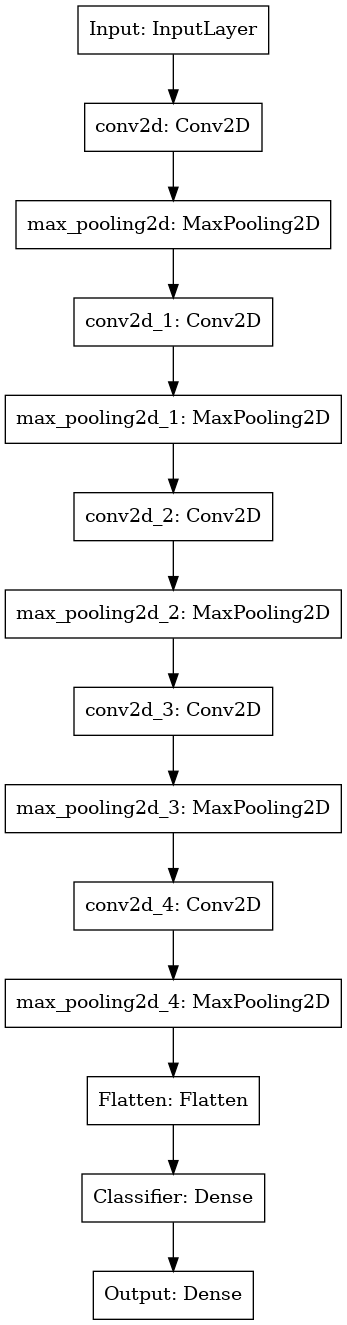

In [ ]:
model = build_model(input_shape)
model.summary()
tfk.utils.plot_model(model)

In [ ]:
history = model.fit(
    x = train_val_gen,
    epochs = epochs,
).history

2021-11-26 11:36:54.711902: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2021-11-26 11:36:56.519906: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2216/2216 [==============================] - 96s 40ms/step - loss: 0.8209 - accuracy: 0.7448
Epoch 2/100
2216/2216 [==============================] - 54s 24ms/step - loss: 0.3225 - accuracy: 0.8946
Epoch 3/100
2216/2216 [==============================] - 55s 25ms/step - loss: 0.1693 - accuracy: 0.9431
Epoch 4/100
2216/2216 [==============================] - 53s 24ms/step - loss: 0.1132 - accuracy: 0.9636
Epoch 5/100
2216/2216 [==============================] - 56s 25ms/step - loss: 0.0819 - accuracy: 0.9735
Epoch 6/100
2216/2216 [==============================] - 57s 26ms/step - loss: 0.0718 - accuracy: 0.9772
Epoch 7/100
2216/2216 [==============================] - 58s 26ms/step - loss: 0.0612 - accuracy: 0.9799
Epoch 8/100
2216/2216 [==============================] - 55s 25ms/step - loss: 0.0652 - accuracy: 0.9808
Epoch 9/100
2216/2216 [==============================] - 57s 26ms/step - loss: 0.0543 - accuracy: 0.9838
Epoch 10/100
2216/2216 [==============================] - 58s 26ms/

In [ ]:
model.save("Model0")

2021-11-26 13:39:41.602336: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
